<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q3-PLN/blob/main/2023_Q3_PLN_AULA_17_Notebook_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves


## **Grandes Modelos de Linguagem**
---


# LangChain

**`LangChain`** is a framework for developing applications powered by language models.

https://python.langchain.com/



This framework consists of several parts:

* **LangChain Libraries**: the Python and JavaScript libraries. Contains interfaces and integrations for a myriad of components, a basic run time for combining these components into chains and agents, and off-the-shelf implementations of chains and agents.

* **LangChain Templates**: a collection of easily deployable reference architectures for a wide variety of tasks.

* **LangServe**: a library for deploying LangChain chains as a REST API.

* **LangSmith**: a developer platform that lets you debug, test, evaluate, and monitor chains built on any LLM framework and seamlessly integrates with LangChain.

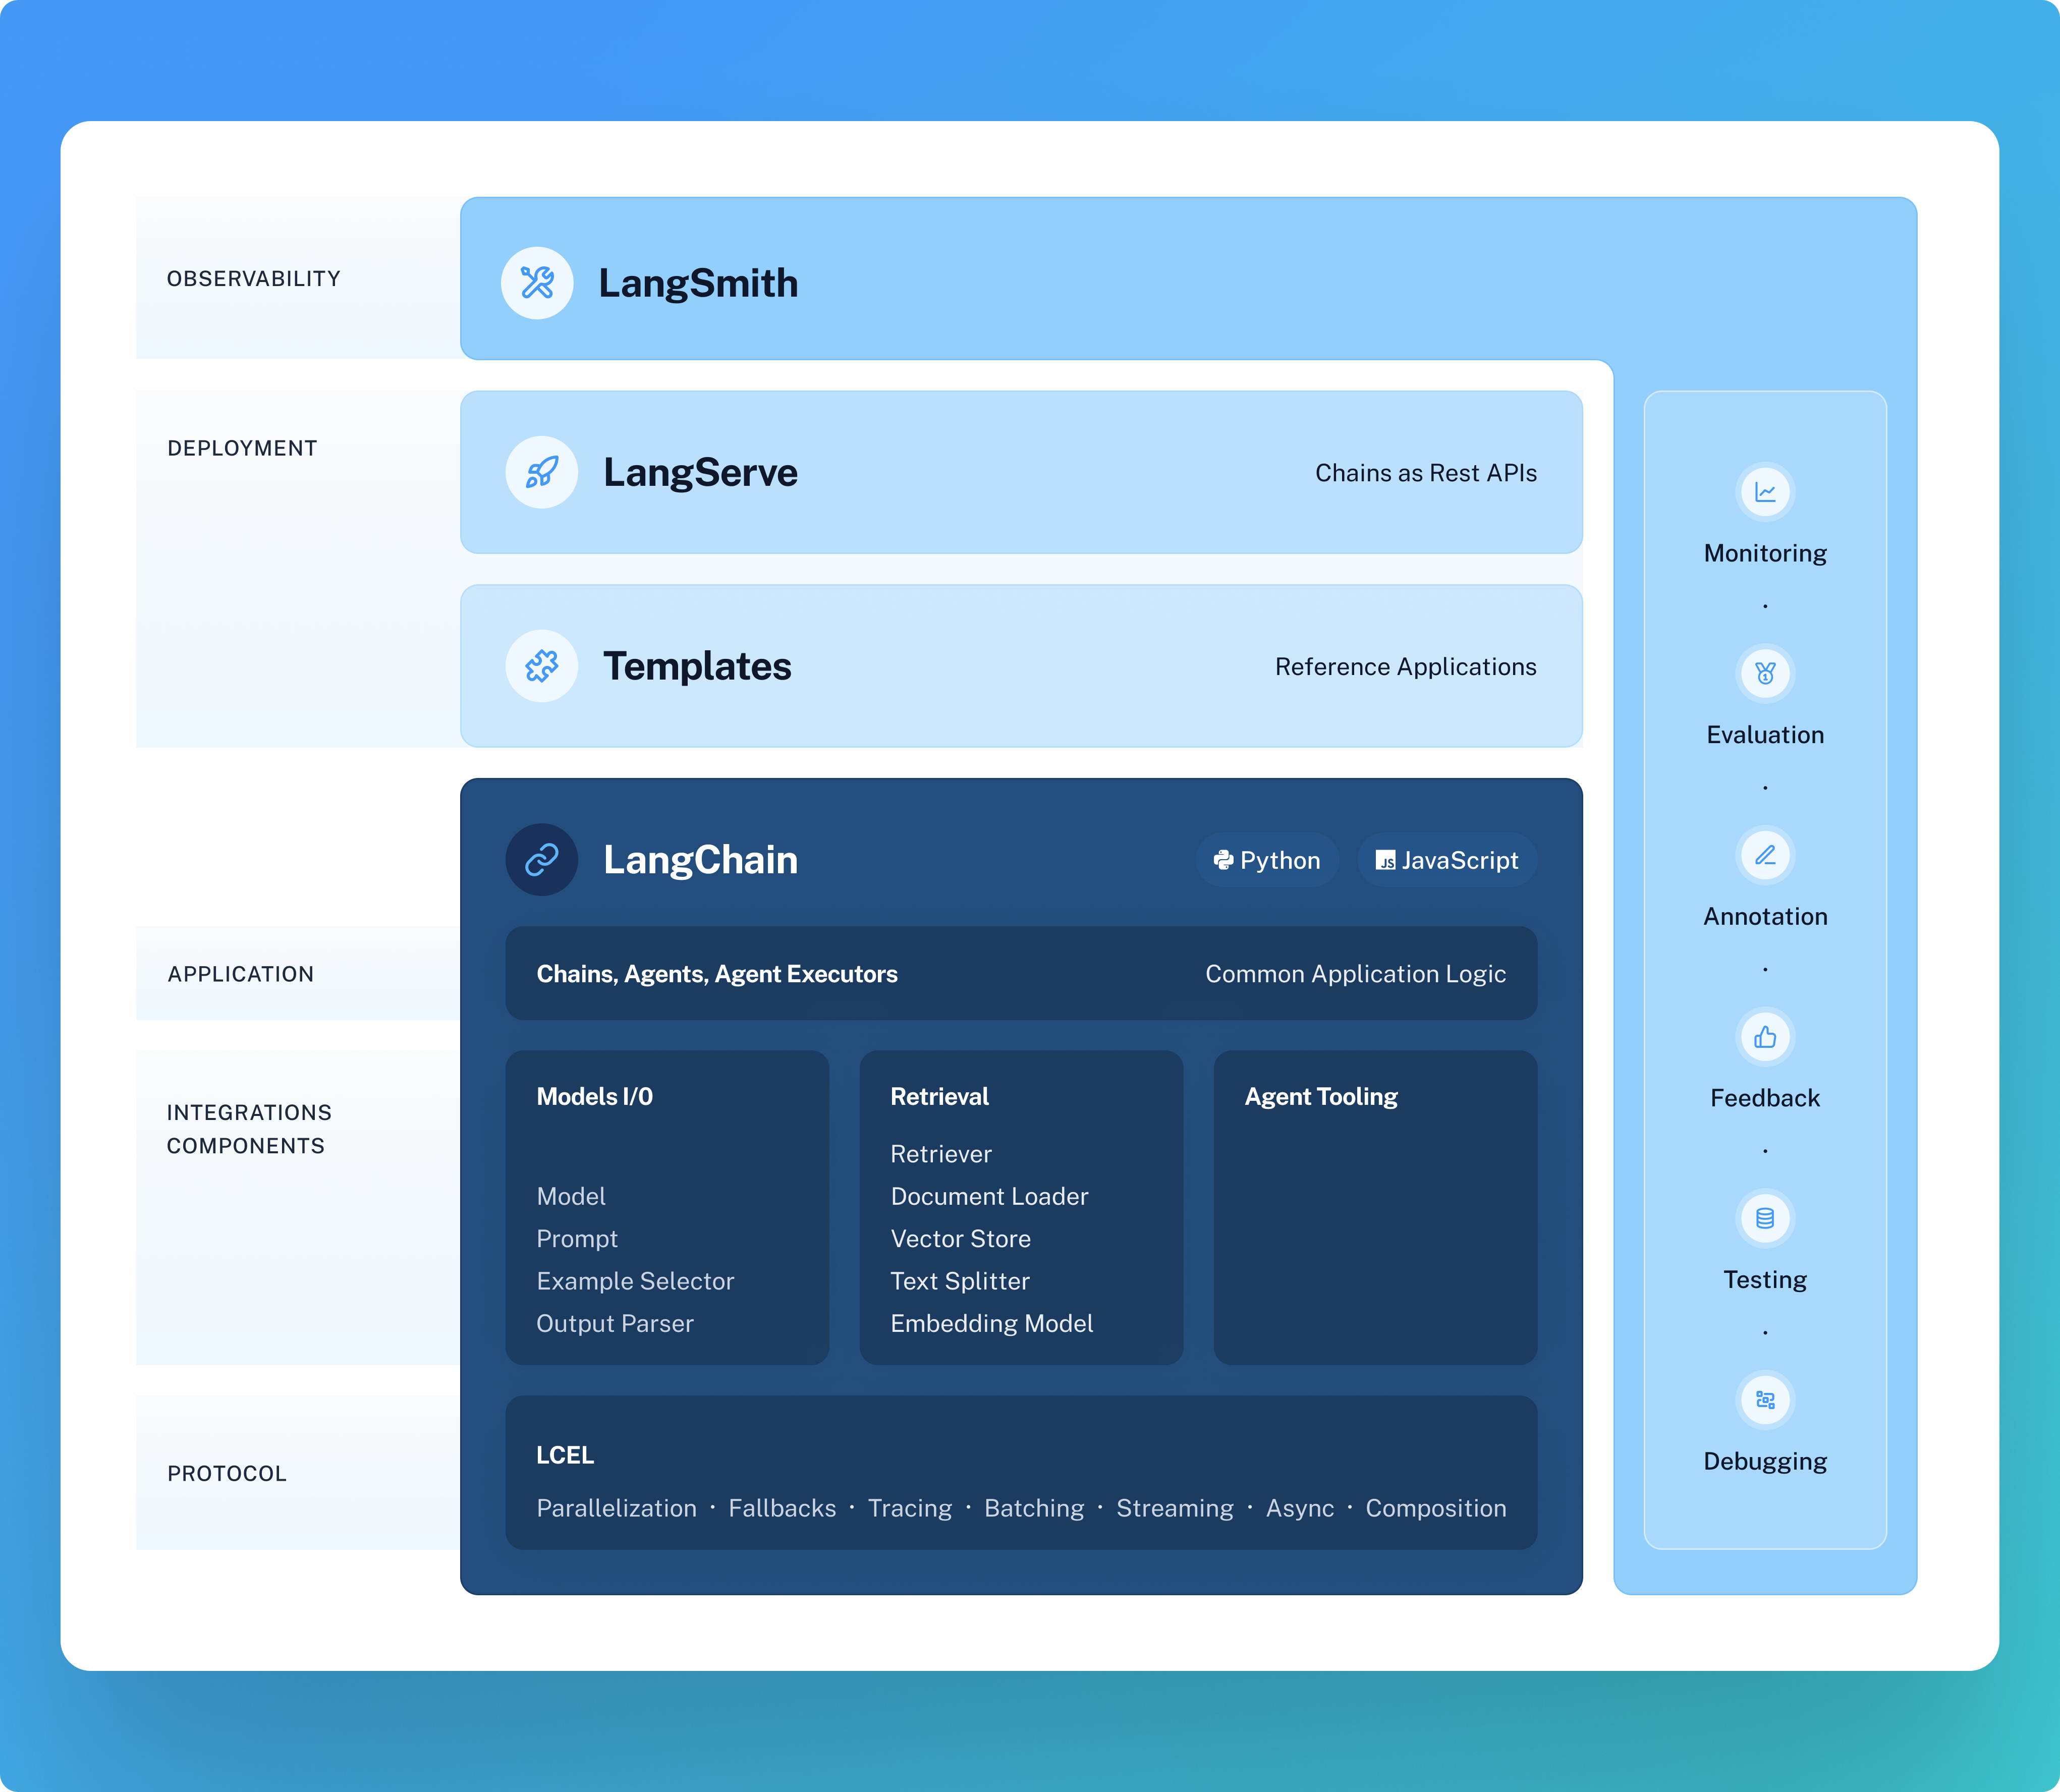

## Instalação

In [1]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.9 MB/s eta 0:00:00


## LLMs

LangChain supports several LLM providers, like **OpenAI**, Hugging Face etc.

Let's start our exploration of LangChain by learning how to use a few of these different LLM integrations.

A generic interface for all LLMs. See all LLM providers:

> https://python.langchain.com/docs/integrations/providers/

In [3]:
!pip install openai==0.28.1

In [4]:
#@title Versão da API da OpenAI

import openai

print(openai.__version__)

0.28.1


In [5]:
#@title Versão do Python no Google Colab

import sys

print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [6]:
from getpass import getpass

OPENAI_API_KEY = getpass()

··········


In [7]:
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

In [8]:
template = """Question: {question}

Answer: Let's think step by step."""

prompt = PromptTemplate(template=template, input_variables=["question"])

In [9]:
llm = OpenAI(openai_api_key = OPENAI_API_KEY)

In [10]:
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [11]:
question = "What NFL team won the Super Bowl in 2020 year?"

llm_chain.run(question)

' In 2020, the Super Bowl was held on February 2nd. That means that the team that won was the Kansas City Chiefs, who defeated the San Francisco 49ers by a score of 31-20.'

**Referências**

> https://python.langchain.com/docs/integrations/llms/openai

> https://python.langchain.com/docs/integrations/platforms/openai

## Building with LangChain

**LangChain** provides many **modules** that can be used to build language model applications.

>

 **Modules** can be used as standalones in simple applications and they can be composed for more complex use cases.

 **Composition** is powered by `LangChain Expression Language` (LCEL), which defines a unified Runnable interface that many modules implement, making it possible to seamlessly chain components.


The simplest and most common chain contains three things:

* **LLM/Chat Model**: The language model is the core reasoning engine here. In order to work with LangChain, you need to understand the different types of language models and how to work with them.

>

* **Prompt Template**: this provides instructions to the language model. This controls what the language model outputs, so understanding how to construct prompts and different prompting strategies is crucial.

>

* **Output Parser**: these translate the raw response from the language model to a more workable format, making it easy to use the output downstream.



## LLM / Chat Model

There are two types of language models:

* **LLM**: underlying model takes a string as input and returns a string

* **ChatModel**: underlying model takes a list of messages as input and returns a message

Strings are simple, but what exactly are messages? The base message interface is defined by `BaseMessage`, which has two required attributes:

* **content**: the content of the message. Usually a string.

>

* **role**: the entity from which the BaseMessage is coming.

LangChain provides several objects to easily distinguish between different roles:

* **HumanMessage**: a BaseMessage coming from a human/user.

>

*  **AIMessage**: a BaseMessage coming from an AI/assistant.

>

* **SystemMessage**: a BaseMessage coming from the system.

* **FunctionMessage** / **ToolMessage**: a BaseMessage containing the output of a function or tool call.

If none of those roles sound right, there is also a **ChatMessage** class where you can specify the role manually.

The simplest way to call an **LLM** or **ChatModel** is using `.invoke()`, the universal synchronous call method for all LangChain Expression Language (LCEL) objects:

* **LLM.invoke**: takes in a string, returns a string.

* **ChatModel.invoke**: takes in a list of BaseMessage, returns a BaseMessage.

In [13]:
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI

llm = OpenAI(openai_api_key = OPENAI_API_KEY)
chat_model = ChatOpenAI(openai_api_key = OPENAI_API_KEY)

In [15]:
from langchain.schema import HumanMessage

text = "What would be a good company name for a company that makes colorful socks?"
messages = [HumanMessage(content=text)]

In [17]:
llm.invoke(text)

'\n\nRainbow Sock Co.'

In [19]:
chat_model.invoke(messages)

AIMessage(content='1. ChromaSock\n2. RainbowThread\n3. VividFootwear\n4. ColorfulStep\n5. HueHosiery\n6. VibrantSocks\n7. PrismSock\n8. ChromaticThreads\n9. KaleidoSock\n10. SpectrumFootwear')

## Prompt Templates

Most LLM applications do not pass user input directly into an LLM. Usually they will add the user input to a larger piece of text, called a **prompt template**, that provides additional context on the specific task at hand.

In [20]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}?")
prompt.format(product="colorful socks")

'What is a good name for a company that makes colorful socks?'

In [21]:
from langchain.prompts.chat import ChatPromptTemplate

template = "You are a helpful assistant that translates {input_language} to {output_language}."
human_template = "{text}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", template),
    ("human", human_template),
])

In [23]:
chat_prompt.format_messages(input_language="English", output_language="French", text="I love programming.")

[SystemMessage(content='You are a helpful assistant that translates English to French.'),
 HumanMessage(content='I love programming.')]

## Output parsers

**OutputParsers** convert the raw output of a language model into a format that can be used downstream. There are few main types of OutputParsers, including:

* Convert text from LLM into structured information (e.g. JSON).

* Convert a ChatMessage into just a string.

* Convert the extra information returned from a call besides the message (like OpenAI function invocation) into a string

In [26]:
from langchain.schema import BaseOutputParser

class CommaSeparatedListOutputParser(BaseOutputParser):
    """Parse the output of an LLM call to a comma-separated list."""

    def parse(self, text: str):
        """Parse the output of an LLM call."""
        return text.strip().split(", ")

CommaSeparatedListOutputParser().parse("hi, bye, hello")

['hi', 'bye', 'hello']

## Composing with LCEL

We can now combine all these into one chain. This chain will take input variables, pass those to a prompt template to create a prompt, pass the prompt to a language model, and then pass the output through an (optional) output parser. This is a convenient way to bundle up a modular piece of logic.

In [27]:
from typing import List

from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema import BaseOutputParser

class CommaSeparatedListOutputParser(BaseOutputParser[List[str]]):
    """Parse the output of an LLM call to a comma-separated list."""


    def parse(self, text: str) -> List[str]:
        """Parse the output of an LLM call."""
        return text.strip().split(", ")

In [32]:
template = """You are a helpful assistant who generates comma separated lists.
A user will pass in a category, and you should generate 5 objects in that category in a comma separated list.
ONLY return a comma separated list, and nothing more."""
human_template = "{text}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", template),
    ("human", human_template),
])

In [36]:
chain = chat_prompt | ChatOpenAI(openai_api_key = OPENAI_API_KEY) | CommaSeparatedListOutputParser()
chain.invoke({"text": "colors"})

['red', 'blue', 'green', 'yellow', 'purple']

**Referência**:

> https://python.langchain.com/docs/get_started/quickstart#building-with-langchain

## Cookbook

> https://python.langchain.com/docs/expression_language/cookbook/

Prompt + LLM

In [42]:
from langchain.prompts import ChatPromptTemplate
from langchain.chat_models import ChatOpenAI

prompt = ChatPromptTemplate.from_template("Conte uma piada sobre {assunto}")
model = ChatOpenAI(openai_api_key = OPENAI_API_KEY)
chain = prompt | model

In [44]:
chain.invoke({"assunto": "português"})

AIMessage(content='Claro! Aqui está:\n\nPor que o português nunca ganha uma corrida?\nPorque ele sempre chega em último porque ele dá voltas e voltas antes de tomar uma decisão!')

Attaching stop sequences

In [51]:
chain = prompt | model.bind(stop=["\n"])

In [52]:
chain.invoke({"assunto": "português"})

AIMessage(content='Por que o português não liga para o que os outros pensam?')

Attaching function call information

In [53]:
functions = [
    {
        "name": "joke",
        "description": "A joke",
        "parameters": {
            "type": "object",
            "properties": {
                "setup": {"type": "string", "description": "The setup for the joke"},
                "punchline": {
                    "type": "string",
                    "description": "The punchline for the joke",
                },
            },
            "required": ["setup", "punchline"],
        },
    }
]

In [54]:
chain = prompt | model.bind(function_call={"name": "joke"}, functions=functions)

In [56]:
chain.invoke({"assunto": "bears"}, config={})

AIMessage(content='', additional_kwargs={'function_call': {'name': 'joke', 'arguments': '{\n"setup": "Por que os ursos não gostam de jogar cartas no meio da floresta?",\n"punchline": "Porque sempre há muitos ursos-trapaceiros!"\n}'}})

Multiple chains

In [59]:
from operator import itemgetter

from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema import StrOutputParser

prompt1 = ChatPromptTemplate.from_template("what is the city {person} is from?")
prompt2 = ChatPromptTemplate.from_template(
    "what country is the city {city} in? respond in {language}"
)

model = ChatOpenAI(openai_api_key = OPENAI_API_KEY)

chain1 = prompt1 | model | StrOutputParser()

chain2 = (
    {"city": chain1, "language": itemgetter("language")}
    | prompt2
    | model
    | StrOutputParser()
)

chain2.invoke({"person": "obama", "language": "french"})

'Le pays où la ville de naissance de Barack Obama, le 44e président des États-Unis, Honolulu, Hawaii, se trouve est les États-Unis.'

Adding moderation

In [60]:
from langchain.chains import OpenAIModerationChain
from langchain.llms import OpenAI
from langchain.prompts import ChatPromptTemplate

In [61]:
moderate = OpenAIModerationChain(openai_api_key = OPENAI_API_KEY)

In [62]:
model = OpenAI(openai_api_key = OPENAI_API_KEY)
prompt = ChatPromptTemplate.from_messages([("system", "repeat after me: {input}")])

In [63]:
chain = prompt | model

In [64]:
chain.invoke({"input": "you are stupid"})

'\n\nYou are stupid'

In [65]:
moderated_chain = chain | moderate

In [66]:
moderated_chain.invoke({"input": "you are stupid"})

{'input': '\n\nYou are stupid',
 'output': "Text was found that violates OpenAI's content policy."}